          ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited

## AIML Module Project - STATISTICAL LEARING - Project 2

- GL | Moderator Copy

### --> Assessment [ Total Score: 30 points ]

Please refer to the problem statement for questions and descriptions

### --> Scoring mechanism [ moderators] :

    " High quality and stritct assessment will enable our learners to achieve a score that they actually deserve and provide them a motivation to improvise for future. We are enabling the learners with high quality assessment and learnings. "


You will find the rubrics divided into 3 parts:
    
    -> Direct points [DP] : 
        1. These points tests the required bare minimum working knowledge on AIML for the learner. 
        2. The output obtained will be fixed and cannot vary much. 
        3. Please award points if the submission is perfectly/near to similar to the sample solution
              
    -> Generic points [GP] : 
        1. These points tests the analytical thinking capacity of the learner. 
        2. These points tests the efforts and time invested by the learner on the project.
        3. The output obtained will vary. 
        4. Please award points only if the submissions are relevant, logical, analytical and innovative.
        
    -> Deduct X points from the total score if any two or more of the below pointers not followed:
        1. ”.html” and ".ipynb" files should be an exact match.
        2. Pre-run codes with all outputs intact.
        3. Error free & machine independent i.e. run on any machine without adding any extra code.
        4. Well commented code for:
            - clarity on code designed
            - assumptions made
            - approach taken
            - insights found
            - results obtained.
        
        - X = 5  --> if the total score of the assignment is 30
        - X = 10 --> if the total score of the assignment is 60 

### 1. Data warehouse: [ DP: 1 point ]

In [1]:
# Import Libraries.
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv('CompanyX_EU.csv')
print(data.shape)
data.head()

(662, 6)


Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating

### 2. Data exploration: [ DP: 2 point ]

In [2]:
# Check the datatypes of each attribute.
data.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [3]:
# Check for null values in the attributes.

data.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

- Turns out we do not have data of funds raised by all the companies
- We would need need it to perform the first task, hence we will have to ignore the companies of which we do not have data for the funds they raised

### 3. Data preprocessing & visualisation: [ GP: 10 points ]

- Award score as per the quality of the visual plots i.e. well commented insights on different relevant attribute combinations. 

In [4]:
# Drop the null values. 
df1 = data.dropna().copy(deep=True)   # drop the rows which have no data for funds raised

In [5]:
# Convert ‘Funds Raised’ features to a numerical value
df1['Funding'].sample(5)

15     $17.9K
398      $24M
158       $8M
324     $350K
610     $1.6M
Name: Funding, dtype: object

- We do not have absolute numbers to directly use in our tests
- The values need some pre-processing
- We will strip the values of the dollar sign and the abbreviations
- First we will have to check all the various abbreviations that the numbers are represented by, then based on the abbreviation we have to bring those numbers on the same scale

In [6]:
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

**Code Explanation:**
Within the lambda function, we passed two if else blocks. If the last element in the value is 'K', then divide the number by 1000 else, if it is 'B', multiply by 1000 else, return as it is. We passed this lambda function to the apply method which we used on the 'Funds Raised' column and assigned the result to a new column ('funds_in_million') in the dataframe

In [7]:
df1.sample(3)

Startup          Product  Funding                Event  \
282      Kaltura      kaltura.com  $166.1M            TC40 2007   
110   ClientShow   clientshow.com    $750K            TC50 2009   
307  LiftIgniter  liftigniter.com     $50K  Disrupt London 2016   

              Result OperatingState  Funds_in_million  
282  Audience choice      Operating            166.10  
110       Contestant         Closed              0.75  
307         Finalist      Operating              0.05

- Run the above cell a couple of times to quickly verify the values
- We have brought the data to a usable form for analysis

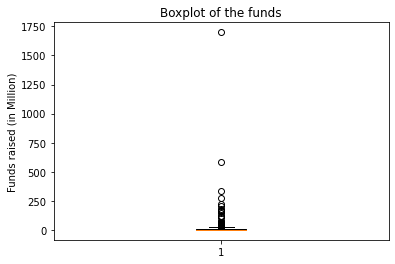

In [8]:
# Plot box plot for funds in million.
plot = plt.boxplot(df1.Funds_in_million)
plt.title('Boxplot of the funds')
plt.ylabel("Funds raised (in Million)")

plt.show()

- There are significant outliers in the data
- For the purpose of this test, we shall remove them

In [9]:
# Get the upper fence from the box plot
upper_fence = plot['caps'][1].get_data()[1][1]   # we can use the values from the box plot itself to get the upper fence
upper_fence

22.0

In [10]:
# Check number of outliers greater than upper fence. 
print(f'Number of outliers = {len(df1[df1.Funds_in_million > upper_fence])}')

df1[df1.Funds_in_million > upper_fence]

Number of outliers = 60


Startup               Product  Funding  \
6         8 Securities       8securities.com     $29M   
31             Anyclip           anyclip.com     $24M   
40               Artsy             artsy.net   $50.9M   
49          Badgeville        badgeville.com     $40M   
56          Betterment        betterment.com    $205M   
108          Clickable         clickable.com   $32.5M   
113         Cloudflare        cloudflare.com  $182.1M   
128      Credit Sesame      creditsesame.com   $35.4M   
130   CrowdFlower Inc.       crowdflower.com     $38M   
132      Cubic Telecom      cubictelecom.com   $37.1M   
138           DataSift          datasift.com     $72M   
139             DataXu            dataxu.com     $64M   
154            Dropbox           dropbox.com    $1.7B   
166             Enigma             enigma.io   $34.6M   
172       EverythingMe         everything.me   $35.5M   
179            Famo.us               famo.us   $30.1M   
180            Farmigo           farmigo.com     $26M   
188             Fitbit            fitbit.com     $66M   
191              Flock             flock.com   $28.3M   
209          Getaround         getaround.com    $103M   
213               Gild              gild.com   $25.9M   
215              Glide              glide.me   $36.5M   
225            Grockit           grockit.com   $44.7M   
231         HackerRank        hackerrank.com   $24.2M   
271     Ionic Security     ionicsecurity.com  $122.4M   
276               IZEA              izea.com   $34.9M   
279               Jiff              jiff.com   $67.8M   
282            Kaltura           kaltura.com  $166.1M   
302              Layer             layer.com   $42.1M   
305          LearnVest         learnvest.com     $69M   
313         LiveIntent        liveintent.com   $65.1M   
325           Lystable          lystable.com   $25.1M   
346               Mint              mint.com   $31.8M   
389        OrderWithMe       orderwithme.com     $37M   
393               Osmo          playosmo.com   $38.5M   
394              Ossia             ossia.com   $25.5M   
398    Owlet Baby Care         owletcare.com     $24M   
427          Postmates         postmates.com    $278M   
432      Prism Skylabs             prism.com     $24M   
435           PubMatic          pubmatic.com     $63M   
460             Roadie            roadie.com     $25M   
471           SeatGeek          seatgeek.com    $160M   
546          StyleSeat         styleseat.com     $40M   
555  Symphony Commerce  symphonycommerce.com   $47.4M   
560           Talkdesk          talkdesk.com   $24.5M   
581           TouchPal          touchpal.com     $25M   
593            TrueCar           truecar.com  $332.4M   
598     UberConference    uberconference.com     $35M   
606             Upwork            upwork.com  $168.8M   
615          VideoSurf         videosurf.com     $28M   
625               Voxy              voxy.com   $30.8M   
643              Xobni             yahoo.com   $41.8M   
644             Yammer            yammer.com    $142M   
647               Yext              yext.com  $117.8M   
649             YouNow            younow.com     $26M   
650       YourMechanic      yourmechanic.com     $28M   
654               ZEFR              zefr.com   $62.1M   
656           Zenefits          zenefits.com  $583.6M   
659             Zocdoc            zocdoc.com    $223M   
661             Zumper            zumper.com   $31.5M   

                         Event           Result OperatingState  \
6         Disrupt Beijing 2011         Finalist      Operating   
31                   TC50 2009         Finalist      Operating   
40            Disrupt NYC 2010       Contestant      Operating   
49             Disrupt SF 2010         Finalist       Acquired   
56            Disrupt NYC 2010         Finalist      Operating   
108                  TC40 2007         Finalist       Acquired   
113            Disrupt SF 2010        Runner up      Operating   
128      

- The above 60 records are of companies that have been funded excessively in comparision to the others in the pool
- Let's see the distribution without these outliers

In [11]:
# Dropping the values that are greater than upper fence.
df1.drop(df1[df1.Funds_in_million > upper_fence].index, inplace = True)

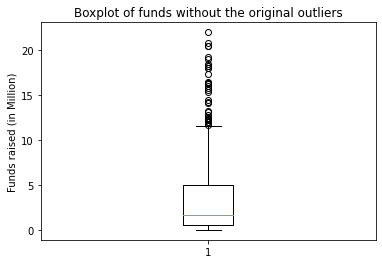

In [12]:
# Plot the box plot after dropping the values.
plot = plt.boxplot(df1.Funds_in_million)
plt.title('Boxplot of funds without the original outliers')
plt.ylabel("Funds raised (in Million)")
plt.show()

In [14]:
# Check frequency of the status features classes.
df1.OperatingState.value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

- Our companies of interest for task 1 are 275 companies that are opetaring and 57 that got closed

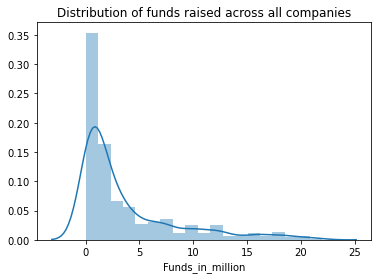

In [15]:
# Plot a distribution plot for Funds in million. 
sns.distplot(df1.Funds_in_million)
plt.title('Distribution of funds raised across all companies')
plt.show()

In [16]:
df1.Funds_in_million.describe()

count    386.00000
mean       3.72514
std        4.73236
min        0.00500
25%        0.60000
50%        1.70000
75%        5.00000
max       22.00000
Name: Funds_in_million, dtype: float64

- 75% of the companies have less than 5 million raised funds, the max however is 22
- Even after removing the outliers, the data is pretty heavily skewed

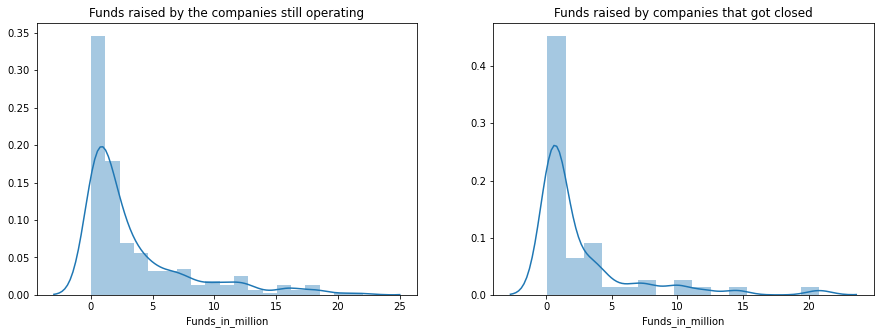

In [17]:
# Plot distribution plots for companies still operating and companies that closed.

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(df1.loc[df1.OperatingState == 'Operating', 'Funds_in_million'], ax = ax[0])
sns.distplot(df1.loc[df1.OperatingState =='Closed', 'Funds_in_million'], ax = ax[1])

ax[0].set_title('Funds raised by the companies still operating')
ax[1].set_title('Funds raised by companies that got closed')
plt.show()

- Visually the distributions are quiet similar
- To prove if there is a significant difference or not we will have to perform a hypothesis test
- Since we want to compare the difference in means of the samples, we can either use 2 sample t test or z-test
- For this exercise we shall do both and compare the results
- One thing to notice is that the distributions are not normal yet, since our sample size is reasonably big ( >30 samples), we will go ahead with the aforementioned tests

### 4. Statistical analysis: [ DP: 15 points ]

- Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? Write the null hypothesis and alternative hypothesis.Test for significance and conclusion. [Score: 3 points]

- Make a copy of the original data frame.

- Check frequency distribution of outcome variable. [Score: 1 point]
- Calculate percentage of winners that are still operating and percentage of contestants that are still operating. [Score: 1 points]
- Write your hypothesis comparing the proportion of companies that are operating between winners and contestants. Write the null hypothesis and alternative hypothesis. Test for significance and conclusion. [Score: 3 points]
- Check distribution of the Event variable. [Score: 2 points]
- Select only the Event that has disrupt keyword from 2013 onwards. [Score: 1 points]
- Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards. [Score: 3 points]
- Plot the distribution plot comparing the 3 city events. [Score: 1 points]

##### Question: Is there any significant difference between Funds raised by companies that are still operating vs companies that got closed down: 

- Write the null hypothesis. 
- Write the alternative hypothesis. 
- Test for significance and Conclusion. 


For the first test, 

**Null hypothesis (Ho)** : There is no difference between the two means

**Alternate hypothesis (Ha)** : There is significant difference between the two means

In [18]:
from statsmodels.stats.weightstats import ztest

sample1 = df1.loc[df1.OperatingState == 'Operating', 'Funds_in_million']
sample2 = df1.loc[df1.OperatingState =='Closed', 'Funds_in_million']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
    

	 Since the p-value, 0.192 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [19]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


- From the tests above we found no evidence to state that the companies that have raised more money tend to suceed more or vice-versa

##### Make a copy of the original data frame.

In [20]:
df2 = data.copy(deep = True)
df2.head()

Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating

##### Check frequency distribution of outcome variable. 

In [22]:
df2.Result.value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

- There are 488 who remained contestants and the rest came out as something more, we'll call all of them winners for now

##### Calculate percentage of winners that are still operating and percentage of contestants that are still operating 

In [25]:
winners = df2.Result.value_counts()[1:].sum()
contestants = df2.Result.value_counts()['Contestant']

contestants_operating = df2.OperatingState[df2.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = df2.OperatingState[df2.Result != 'Contestant'].value_counts().loc['Operating']

winners_operating/winners, contestants_operating/contestants

(0.764367816091954, 0.680327868852459)

- There is some difference between the proportion operational companies in the two categories, but let's see if the differnce is significant
- There are two ways we can check if the difference is significant
    - Z-test for proportions
    - Chi-square test
- We shall perform z-test in this case, however, do experiment with Chi-square test and observe if the p-value from both tests gives the same conclusion or not

### Question: Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

- Write the null hypothesis. 
- Write the alternative hypothesis. 
- Test for significance and Conclusion. 

**Null hyputhesis (Ho)**: The proportion of companies that are operating is the same in both categories - winners and contestants

**Alternative hypothesis (Ha)**: The proportion of companies that are operating is significantly different from each other, among the two categories

In [26]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.037 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


##### Conclusion
- The amount of funds a company raises is not a significant factor in deciding if the company will remain operational or close down
- Winners in the battle have proven to remain operational more so, than the companies that came out only as contestants

### Event Variable

We have the information about the event location where each company has participated and in which year so what we want to do is, see if there is a significant difference among the funds raised by the companies from New York, San Fransisco and Europe (EU and London combined)

##### Check distribution of the Event variable. [ Score: 1 point ]

In [27]:
df1[df1.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt NY 2015         21
Disrupt SF 2015         19
Disrupt SF 2014         19
Disrupt NYC 2013        19
Disrupt SF 2013         19
Disrupt SF 2011         19
Disrupt NYC 2012        19
Disrupt SF 2016         17
Disrupt NY 2016         16
Disrupt NYC 2011        15
Disrupt SF 2012         15
Disrupt NYC 2014        15
Disrupt SF 2010         13
Disrupt London 2015     11
Disrupt London 2016     10
Disrupt EU 2014         10
Disrupt NYC 2010        10
Disrupt EU 2013          9
Disrupt Beijing 2011     4
Name: Event, dtype: int64

- We have considered only the "Disrupt" events
- Since we have the data for the EU only from 2013, we'll drop the records pertaining to events earlier than 2013

##### Select only the Event that has disrupt keyword from 2013 onwards. 

In [28]:
events = df1[df1.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event  # all the events of relevance
events

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
635        Disrupt NY 2015
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
660        Disrupt SF 2013
Name: Event, Length: 185, dtype: object

##### Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.

In [29]:
NY_events = df1.loc[events[events.apply(lambda x: 'NY' in x)].index, 'Funds_in_million']
SF_events = df1.loc[events[events.apply(lambda x: 'SF' in x)].index, 'Funds_in_million']
EU_events = df1.loc[events[events.apply(lambda x: 'EU' in x or 'London' in x)].index, 'Funds_in_million']
print(len(NY_events), len(SF_events), len(EU_events))

71 74 40


- Each of the three above variables hold the amount of funds with respect to the Cities where the even was organised
- The sample sizes are different across the three categories and it is okay to perform ANOVA on samples of different sizes


**Null Hypothesis(Ho)**: Average funds raised by companies across three cities are the same 

**Alternative Hypothesis(Ha)**: Average funds raised by companies across three cities are the different

##### Plot the distribution plot comparing the 3 city events. 

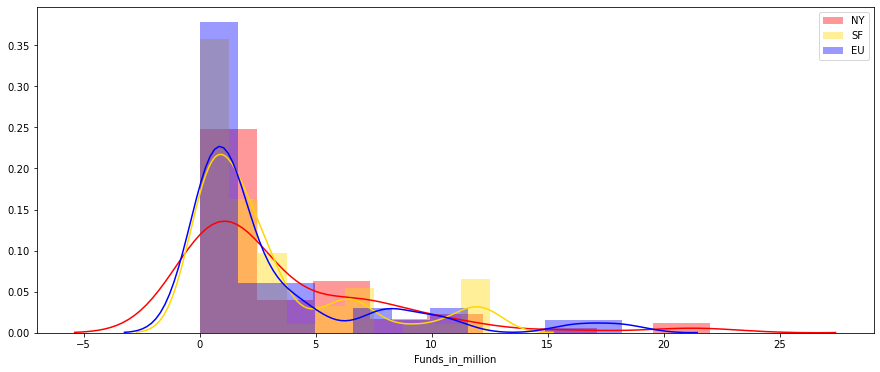

In [30]:
plt.figure(figsize=(15,6))
sns.distplot(NY_events, color = 'Red', label = 'NY')
sns.distplot(SF_events, color = 'Gold', label = 'SF')
sns.distplot(EU_events, color = 'blue', label = 'EU')
plt.legend()
plt.show()

- Visually the distributions look quiet similar
- The Modes of the three distributions are quiet the same
- Dispersion in NY quiet high compared to the others
- Let's see what the test says

In [31]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(NY_events, SF_events, EU_events)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.628 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


- The distribution of funds raised by the companies across the three regions is the same
- We found no evidence to say companies participating in certain regions have funds either significantly on the higher side or on the lower side

### 5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis. [ Score: 2 points ]


                                        END

    ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited